In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# PREDICCIONES DE LA BOLSA
### Red Neuronal Recurrente

Epoch 1/40
168/168 [==============================] - 8s 17ms/step - loss: 0.0035 - val_loss: 0.0328
Epoch 2/40
168/168 [==============================] - 2s 10ms/step - loss: 6.3381e-04 - val_loss: 0.0075
Epoch 3/40
168/168 [==============================] - 2s 10ms/step - loss: 1.4785e-04 - val_loss: 0.0019
Epoch 4/40
168/168 [==============================] - 2s 10ms/step - loss: 4.7702e-05 - val_loss: 0.0017
Epoch 5/40
168/168 [==============================] - 2s 10ms/step - loss: 4.5781e-05 - val_loss: 0.0021
Epoch 6/40
168/168 [==============================] - 2s 13ms/step - loss: 4.2302e-05 - val_loss: 0.0015
Epoch 7/40
168/168 [==============================] - 3s 16ms/step - loss: 4.4797e-05 - val_loss: 0.0014
Epoch 8/40
168/168 [==============================] - 2s 10ms/step - loss: 4.3834e-05 - val_loss: 0.0013
Epoch 9/40
168/168 [==============================] - 2s 10ms/step - loss: 4.4783e-05 - val_loss: 0.0014
Epoch 10/40
168/168 [==============================] - 2s 1

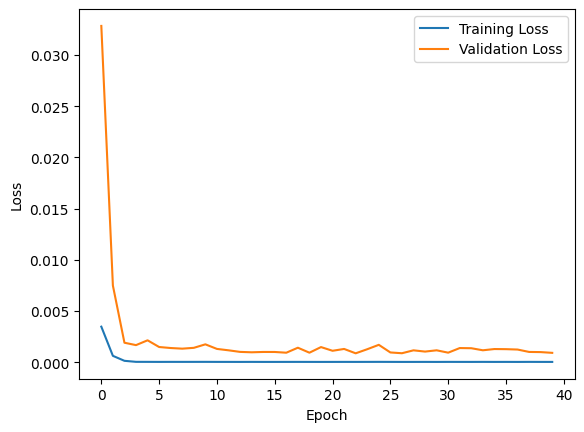

Training Loss: 0.00012870914360973984
Test Loss: 0.0015228322008624673
5/5 [==============================] - 1s 6ms/step


In [18]:

# Obtener datos históricos de precios de acciones de Amazon
amazon_data = yf.download('AMZN', start='1998-01-01', end='2024-05-01', progress=False)

# Filtrar y seleccionar solo los precios de cierre
amazon_close = amazon_data['Close'].values.reshape(-1, 1)

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
amazon_close_scaled = scaler.fit_transform(amazon_close)

# Función para crear secuencias de datos
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
    return np.array(sequences)

# Definir la longitud de la secuencia
sequence_length = 10

# Crear secuencias de datos
X = create_sequences(amazon_close_scaled, sequence_length)
y = amazon_close_scaled[sequence_length:]

# Dividir los datos en conjuntos de entrenamiento y prueba
split_ratio = 0.9
split_index = int(split_ratio * len(X))

X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

# Construir el modelo de red neuronal recurrente (usanndo un variante)
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=50, return_sequences=True),
    Dense(units=1)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.1)

# Graficar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluar el modelo
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Training Loss: {train_loss}')
print(f'Test Loss: {test_loss}')

fraction_of_data = 0.2  # Cambia este valor según la fracción deseada
num_predictions = int(len(X_test) * fraction_of_data)
predictions = model.predict(X_test[:num_predictions])

# Aplanar las predicciones
predictions_flat = predictions.flatten()

# Desnormalizar las predicciones y los valores reales
predictions_unscaled = scaler.inverse_transform(predictions_flat.reshape(-1, 1))
y_test_unscaled = scaler.inverse_transform(y_test[:num_predictions])



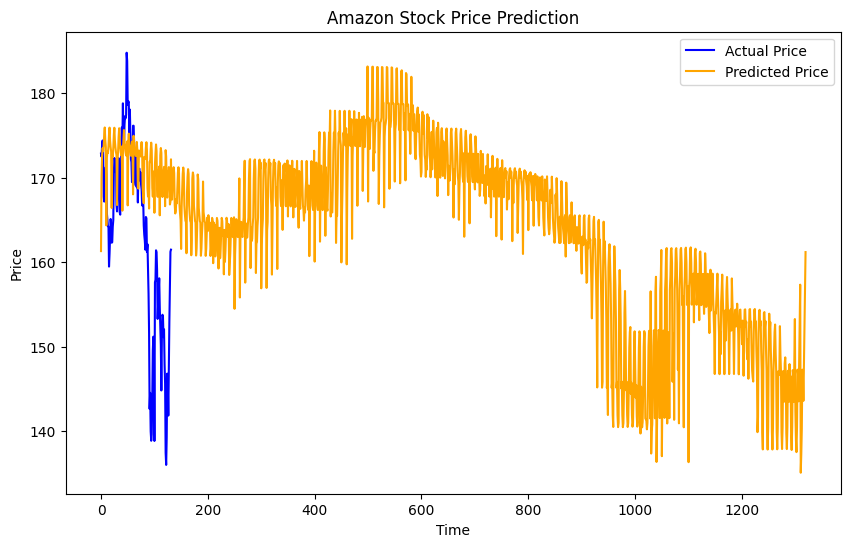

In [19]:

# Graficar las predicciones y los valores reales
plt.figure(figsize=(10, 6))
plt.plot(y_test_unscaled, label='Actual Price', color='blue')
plt.plot(predictions_unscaled, label='Predicted Price', color='orange')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Amazon Stock Price Prediction')
plt.legend()
plt.show()